In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from pylab import * 
import pylab as plab
from pandas.plotting import scatter_matrix
import seaborn as sns
import folium
from branca.colormap import linear
import os
import json
%matplotlib inline


# use ggplot style
matplotlib.style.use('ggplot')
import csv as csv
#from itertools import groupby
pd.options.display.max_info_columns
pd.options.display.max_columns=100 # set max columns to 100
#np.set_printoptions(precision=4, suppress=True)

In [2]:
#read  in csv
complaint_data = pd.read_csv('Consumer_Complaints.csv', sep=',',header='infer',parse_dates=True, dayfirst = True, engine="python", nrows=1644795)
#complaint_data=pd.read_csv('test.csv')
complaint_data.values

array([['08-09-15', 'Credit reporting', nan, ..., 'Yes', 'No', 1509954],
       ['01/29/2019',
        'Credit reporting, credit repair services, or other personal consumer reports',
        'Credit reporting', ..., 'Yes', nan, 3136759],
       ['08/19/2015', 'Mortgage',
        'Conventional adjustable mortgage (ARM)', ..., 'Yes', 'No',
        1527601],
       ...,
       ['05-07-12', 'Credit card', nan, ..., 'Yes', 'Yes', 37544],
       ['03/27/2012', 'Student loan', 'Non-federal student loan', ...,
        'Yes', 'No', 41703],
       ['05/20/2012', 'Mortgage', 'Other mortgage', ..., 'Yes', 'No',
        84937]], dtype=object)

In [4]:
#cat Consumer_Complaints.csv  | wc -l ==> to count rows in that file
complaint_data.head(1)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,08-09-15,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,Company chooses not to provide a public response,Experian Information Solutions Inc.,NJ,8872,NaN,Consent not provided,Web,08-09-15,Closed with non-monetary relief,Yes,No,1509954


In [5]:
# create a temporary dataset

df = complaint_data
df.head(200)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,08-09-15,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,Company chooses not to provide a public response,Experian Information Solutions Inc.,NJ,8872,NaN,Consent not provided,Web,08-09-15,Closed with non-monetary relief,Yes,No,1509954
1,01/29/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Was not notified of investigation status or re...,NaN,NaN,"EQUIFAX, INC.",NY,10801,NaN,Consent not provided,Web,01/30/2019,Closed with non-monetary relief,Yes,NaN,3136759
2,08/19/2015,Mortgage,Conventional adjustable mortgage (ARM),"Loan servicing, payments, escrow account",NaN,NaN,Company chooses not to provide a public response,WELLS FARGO & COMPANY,CA,94526,NaN,Consent not provided,Web,08/19/2015,Closed with explanation,Yes,No,1527601
3,03-04-16,Credit card,NaN,Billing disputes,NaN,I am dissatisfied with the current outcome of ...,NaN,DISCOVER BANK,NV,891XX,NaN,Consent provided,Web,03-04-16,Closed with explanation,Yes,Yes,1816726
4,03/18/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",PA,175XX,NaN,NaN,Referral,03/19/2013,Closed with explanation,Yes,No,358304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,09/15/2015,Mortgage,Conventional adjustable mortgage (ARM),"Loan modification,collection,foreclosure",NaN,NaN,Company chooses not to provide a public response,WELLS FARGO & COMPANY,CA,931XX,NaN,Consent not provided,Web,09/15/2015,Closed with explanation,Yes,No,1566211
196,05/31/2016,Mortgage,VA mortgage,"Loan servicing, payments, escrow account",NaN,Our problems started when Freedom Mortgage rep...,Company has responded to the consumer and the ...,FREEDOM MORTGAGE COMPANY,TX,750XX,"Older American, Servicemember",Consent provided,Web,06-03-16,Closed with explanation,Yes,No,1947633
197,03-03-17,Debt collection,Credit card,Communication tactics,Used obscene/profane/abusive language,NaN,NaN,"Security Credit Services, LLC",VA,220XX,NaN,Consent not provided,Web,03-03-17,Closed with explanation,Yes,No,2369124
198,10/18/2018,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",MD,211XX,NaN,Other,Web,10/18/2018,Closed with explanation,Yes,NaN,3049556


In [6]:
# Verify the type of the object
type(df)

pandas.core.frame.DataFrame

In [7]:
# Internal nature of the object
print("The shape is: ",df.shape)
print(df.dtypes)

The shape is:  (1048575, 18)
Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Consumer disputed?              object
Complaint ID                     int64
dtype: object


In [9]:
# rename some columns 

df.columns = [  'Date received','Product','Sub_product','issue','sub-issue','consumer_complaint_explanation','Company_response','Company','State','Postal_code','Tags','Consumer_consent_provided','Complaint_Submission_type','Date_sent_to_company','Company_response_to_consumer','Timely_response_yes_no','Consumer disagrees','Complaint ID' ]

In [10]:
print(df.dtypes)

Date received                     object
Product                           object
Sub_product                       object
issue                             object
sub-issue                         object
consumer_complaint_explanation    object
Company_response                  object
Company                           object
State                             object
Postal_code                       object
Tags                              object
Consumer_consent_provided         object
Complaint_Submission_type         object
Date_sent_to_company              object
Company_response_to_consumer      object
Timely_response_yes_no            object
Consumer disagrees                object
Complaint ID                       int64
dtype: object


In [11]:
df.head(2)

,Date received,Product,Sub_product,issue,sub-issue,consumer_complaint_explanation,Company_response,Company,State,Postal_code,Tags,Consumer_consent_provided,Complaint_Submission_type,Date_sent_to_company,Company_response_to_consumer,Timely_response_yes_no,Consumer disagrees,Complaint ID
0,08-09-15,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,Company chooses not to provide a public response,Experian Information Solutions Inc.,NJ,8872,NaN,Consent not provided,Web,08-09-15,Closed with non-monetary relief,Yes,No,1509954
1,01/29/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Was not notified of investigation status or re...,NaN,NaN,"EQUIFAX, INC.",NY,10801,NaN,Consent not provided,Web,01/30/2019,Closed with non-monetary relief,Yes,NaN,3136759


In [12]:
# copy the data to csv file 
df.to_csv('usconsumercomplaints.csv')

# New Dataset


In [13]:
#read  in csv
complaint_data=pd.read_csv('usconsumercomplaints.csv', sep=',',header='infer',index_col=14,parse_dates=True, dayfirst = True, engine="python")
complaint_data.values

array([[0, '08-09-15', 'Credit reporting', ..., 'Yes', 'No', 1509954],
       [1, '01/29/2019',
        'Credit reporting, credit repair services, or other personal consumer reports',
        ..., 'Yes', nan, 3136759],
       [2, '08/19/2015', 'Mortgage', ..., 'Yes', 'No', 1527601],
       ...,
       [1048572, '05-07-12', 'Credit card', ..., 'Yes', 'Yes', 37544],
       [1048573, '03/27/2012', 'Student loan', ..., 'Yes', 'No', 41703],
       [1048574, '05/20/2012', 'Mortgage', ..., 'Yes', 'No', 84937]],
      dtype=object)

In [14]:
# create a new dataframe
df = complaint_data
df.head(1)

,Unnamed: 0,Date received,Product,Sub_product,issue,sub-issue,consumer_complaint_explanation,Company_response,Company,State,Postal_code,Tags,Consumer_consent_provided,Complaint_Submission_type,Company_response_to_consumer,Timely_response_yes_no,Consumer disagrees,Complaint ID
Date_sent_to_company,,,,,,,,,,,,,,,,,,
2015-09-08,0,08-09-15,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,Company chooses not to provide a public response,Experian Information Solutions Inc.,NJ,8872,NaN,Consent not provided,Web,Closed with non-monetary relief,Yes,No,1509954


In [15]:
# delete unuse variables
variableToDrop = ['Tags', 'Unnamed: 0','Complaint ID']
# Verify whether there are some missing values(nan) in the postcode field, then drop those
df = df.drop(variableToDrop,1).dropna(subset=['Postal_code'])

In [16]:
# verify the data type
print(df.dtypes)

Date received                     object
Product                           object
Sub_product                       object
issue                             object
sub-issue                         object
consumer_complaint_explanation    object
Company_response                  object
Company                           object
State                             object
Postal_code                       object
Consumer_consent_provided         object
Complaint_Submission_type         object
Company_response_to_consumer      object
Timely_response_yes_no            object
Consumer disagrees                object
dtype: object


In [17]:
# setting the index of the dataframe to date time
#df.index.to_datetime(dayfirst=True)
pd.to_datetime(df.index)

DatetimeIndex(['2015-09-08', '2019-01-30', '2015-08-19', '2016-04-03',
               '2013-03-19', '2011-12-22', '2018-10-24', '2018-03-03',
               '2019-01-18', '2018-12-23',
               ...
               '2016-12-15', '2012-10-08', '2014-10-31', '2019-10-29',
               '2015-11-22', '2013-04-02', '2015-03-08', '2012-08-05',
               '2012-03-28', '2012-05-29'],
              dtype='datetime64[ns]', name='Date_sent_to_company', length=955412, freq=None)

In [18]:
print(df.dtypes)

Date received                     object
Product                           object
Sub_product                       object
issue                             object
sub-issue                         object
consumer_complaint_explanation    object
Company_response                  object
Company                           object
State                             object
Postal_code                       object
Consumer_consent_provided         object
Complaint_Submission_type         object
Company_response_to_consumer      object
Timely_response_yes_no            object
Consumer disagrees                object
dtype: object


# Product

In [19]:
df["Product"].describe()

count       955412
unique          18
top       Mortgage
freq        194440
Name: Product, dtype: object

In [20]:
# Make a crosstab to count values of product
    
Product_tab = pd.crosstab(index=df.Product, columns="count_product")
Product_tab

col_0,count_product
Product,
Bank account or service,66501
Checking or savings account,29607
Consumer Loan,23926
Credit card,69242
Credit card or prepaid card,34280
Credit reporting,109978
"Credit reporting, credit repair services, or other personal consumer reports",174370
Debt collection,183732
"Money transfer, virtual currency, or money service",6602


In [21]:
# get some statistics of the overall products
Product_tab.describe()

col_0,count_product
count,18.000000
mean,53078.444444
std,67190.840387
min,7.000000
25%,4613.250000
50%,26766.500000
75%,68556.750000
max,194440.000000


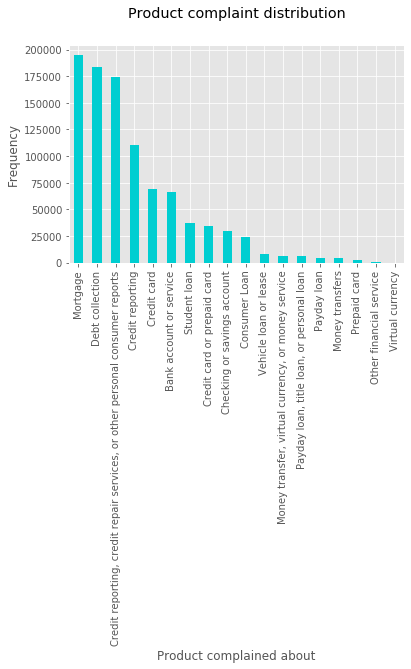

In [22]:
# plot the distribution of complaint by products
bar = df.Product.value_counts().plot(kind='bar', color=['darkturquoise'], label='Product')
plt.title('Product complaint distribution', y=1.1)
plt.ylabel('Frequency')
plt.xlabel('Product complained about')
plt.show()
#plt.savefig('product complaints.png', bbox_inches='tight')

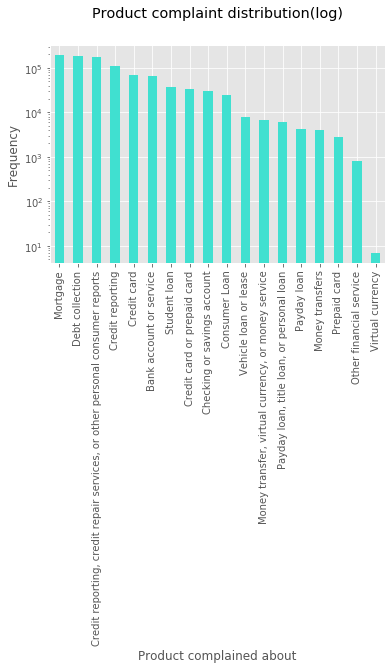

In [23]:
# using log to see the value of financial service and virtual currency

# plot the distribution of complaint by products
barlist = df.Product.value_counts().plot(kind='bar',logy=True, color=['turquoise'], label='Product')
plt.title('Product complaint distribution(log)', y=1.1)
plt.ylabel('Frequency')
plt.xlabel('Product complained about')
plt.show()
#plt.savefig('product complaints log.png', bbox_inches='tight')

In [24]:
df_mapping = df.loc[:,('State','Product')]

df_mapping["Mortgage"]= df_mapping.Product.str.contains("Mortgage")

df_mapping.Mortgage = df_mapping.Mortgage.astype(int)

df_mapping = df_mapping.loc[:,("State","Mortgage")]

df_mapping.head()

#df_mortagage = df.Product="Mortgage"
#df_mortagage

,State,Mortgage
Date_sent_to_company,,
2015-09-08,NJ,0
2019-01-30,NY,0
2015-08-19,CA,1
2016-04-03,NV,0
2013-03-19,PA,1


In [25]:
df_mapping.describe()

,Mortgage
count,955412.000000
mean,0.203514
std,0.402612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [26]:
# get the united states topology  
us_states = os.path.join('us-states.json')
# load the topology
geo_json_data = json.load(open(us_states))

In [27]:
from branca.colormap import linear

colormap = linear.YlGn_06.scale(
    df_mapping.Mortgage.value_counts().min(),
    df_mapping.Mortgage.value_counts().max())

print(colormap(5.0))

#ffffcc


In [28]:
# create a dictionary from the df_mapping dataframe and set its key index to state 
mortgage_dict = df_mapping.set_index('State')['Mortgage']

# print 
mortgage_dict["AL"].head()

AL    1
AL    0
AL    0
AL    1
AL    0
Name: Mortgage, dtype: int32

# Subproduct complained about

In [29]:
# Make a crosstab to count values of Sub product

Subproduct_tab = pd.crosstab(index=df.Sub_product, columns="count_Subproduct")
Subproduct_tab

col_0,count_Subproduct
Sub_product,
(CD) Certificate of deposit,2644
Auto,2865
Auto debt,2262
CD (Certificate of Deposit),858
Cashing a check without an account,484
...,...
TravelerÃ¢â‚¬â„¢s/CashierÃ¢â‚¬â„¢s checks,70
VA mortgage,5237
Vehicle lease,1972


In [30]:
# get sub_product statistics 
Subproduct_tab.describe()

col_0,count_Subproduct
count,76.000000
mean,10158.605263
std,23077.329327
min,2.000000
25%,424.750000
50%,2229.000000
75%,9517.500000
max,171243.000000


# Complaints Submission_type

In [31]:
df["Complaint_Submission_type"].describe()

count     955412
unique         6
top          Web
freq      696424
Name: Complaint_Submission_type, dtype: object

In [32]:
# get the count of complaints submission by their respective type 
Submission_type_tab = pd.crosstab(index=df.Complaint_Submission_type, columns="Submission_type")
Submission_type_tab

col_0,Submission_type
Complaint_Submission_type,
Email,256
Fax,14736
Phone,55147
Postal mail,53440
Referral,135409
Web,696424


In [33]:
# get complaints submission type statistics
Submission_type_tab.describe()

col_0,Submission_type
count,6.000000
mean,159235.333333
std,267327.842623
min,256.000000
25%,24412.000000
50%,54293.500000
75%,115343.500000
max,696424.000000


In [34]:
# copy the dataframe, to avoid any data loss or issues
df1 = df
df1.head(2)

,Date received,Product,Sub_product,issue,sub-issue,consumer_complaint_explanation,Company_response,Company,State,Postal_code,Consumer_consent_provided,Complaint_Submission_type,Company_response_to_consumer,Timely_response_yes_no,Consumer disagrees
Date_sent_to_company,,,,,,,,,,,,,,,
2015-09-08,08-09-15,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,Company chooses not to provide a public response,Experian Information Solutions Inc.,NJ,8872,Consent not provided,Web,Closed with non-monetary relief,Yes,No
2019-01-30,01/29/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Was not notified of investigation status or re...,NaN,NaN,"EQUIFAX, INC.",NY,10801,Consent not provided,Web,Closed with non-monetary relief,Yes,NaN


In [35]:
# create additional columns that extract individual Complaints Submissions types
df1["EmailSubmission"]= df.Complaint_Submission_type.str.contains("Email")
df1["FaxSubmission"]= df.Complaint_Submission_type.str.contains("Fax")
df1["PhoneSubmission"]= df.Complaint_Submission_type.str.contains("Phone")
df1["PostalSubmission"]= df.Complaint_Submission_type.str.contains("Postal mail")
df1["ReferralSubmission"]= df.Complaint_Submission_type.str.contains("Referral")
df1["WebSubmission"]= df.Complaint_Submission_type.str.contains("Web")

In [36]:
# verify that the dataset has been updated
df1.head(1)

,Date received,Product,Sub_product,issue,sub-issue,consumer_complaint_explanation,Company_response,Company,State,Postal_code,Consumer_consent_provided,Complaint_Submission_type,Company_response_to_consumer,Timely_response_yes_no,Consumer disagrees,EmailSubmission,FaxSubmission,PhoneSubmission,PostalSubmission,ReferralSubmission,WebSubmission
Date_sent_to_company,,,,,,,,,,,,,,,,,,,,,
2015-09-08,08-09-15,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,Company chooses not to provide a public response,Experian Information Solutions Inc.,NJ,8872,Consent not provided,Web,Closed with non-monetary relief,Yes,No,False,False,False,False,False,True


In [37]:
# create a new data frame  which select individual Complaint submission type
# This will allow easy plotting of the variable Complaint_Submission_type

submitted_via =df1.loc[:,["EmailSubmission","FaxSubmission", "PhoneSubmission","PostalSubmission","ReferralSubmission", "WebSubmission"]]


submitted_via.head()

,EmailSubmission,FaxSubmission,PhoneSubmission,PostalSubmission,ReferralSubmission,WebSubmission
Date_sent_to_company,,,,,,
2015-09-08,False,False,False,False,False,True
2019-01-30,False,False,False,False,False,True
2015-08-19,False,False,False,False,False,True
2016-04-03,False,False,False,False,False,True
2013-03-19,False,False,False,False,True,False


In [38]:
submitted_via.EmailSubmission = submitted_via.EmailSubmission.astype(int)
submitted_via.FaxSubmission= submitted_via.FaxSubmission.astype(int)
submitted_via.PhoneSubmission= submitted_via.PhoneSubmission.astype(int)
submitted_via.PostalSubmission = submitted_via.PostalSubmission.astype(int)
submitted_via.ReferralSubmission= submitted_via.ReferralSubmission.astype(int)   
submitted_via.WebSubmission= submitted_via.WebSubmission.astype(int)

submitted_via.head(2)

,EmailSubmission,FaxSubmission,PhoneSubmission,PostalSubmission,ReferralSubmission,WebSubmission
Date_sent_to_company,,,,,,
2015-09-08,0,0,0,0,0,1
2019-01-30,0,0,0,0,0,1


In [39]:
# compute the sum of each individual complaint submission type

EmailSubmission_total=sum(submitted_via.EmailSubmission  ==True)
FaxSubmission_total=sum(submitted_via.FaxSubmission  ==True)
PhoneSubmission_total=sum(submitted_via.PhoneSubmission ==True)
PostalSubmission_total=sum(submitted_via.PostalSubmission ==True)
ReferralSubmission_total=sum(submitted_via.ReferralSubmission ==True)
WebSubmission_total=sum(submitted_via.WebSubmission == True)

In [40]:
# create a dictionary which keys correspond to the type of complaint submission
# and the values as total number of each individual complaint submission type  

submitted_via1 = {"EmailSubmission": EmailSubmission_total, "FaxSubmission": FaxSubmission_total, "PhoneSubmission": PhoneSubmission_total, 
        "PostalSubmission": PostalSubmission_total, "ReferralSubmission": ReferralSubmission_total, "WebSubmission": WebSubmission_total}

In [41]:
# This data is ready to be plotted(variable complaint submission type )
submitted_via1

{'EmailSubmission': 256,
 'FaxSubmission': 14736,
 'PhoneSubmission': 55147,
 'PostalSubmission': 53440,
 'ReferralSubmission': 135409,
 'WebSubmission': 696424}

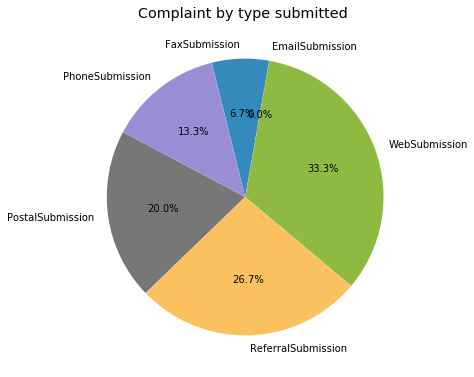

<Figure size 432x288 with 0 Axes>

In [42]:
# Pie chart visualization 
# explode must be len(x) sequence or None
# make a square figure and axes
figure(1, figsize=(6,6))
ax = axes([0.2, 0.2, 0.8, 0.8])
labels = 'EmailSubmission','FaxSubmission','PhoneSubmission','PostalSubmission','ReferralSubmission','WebSubmission'
explode =(0.001, 0.001, 0.001, 0.001, 0.001, 0.001)
piechart =plt.pie(range(len(submitted_via1 )),explode=explode,labels=labels,autopct='%1.1f%%',startangle=80)
title('Complaint by type submitted ')
show(piechart)
#pdf.savefig()
savefig('Complaint by type submitted', bbox_inches='tight')

# Sub Product

In [43]:
#Company_response_to_consumer
Subproduct_tab = pd.crosstab(index=df.Sub_product, columns="count_Subproduct")
Subproduct_tab

col_0,count_Subproduct
Sub_product,
(CD) Certificate of deposit,2644
Auto,2865
Auto debt,2262
CD (Certificate of Deposit),858
Cashing a check without an account,484
...,...
TravelerÃ¢â‚¬â„¢s/CashierÃ¢â‚¬â„¢s checks,70
VA mortgage,5237
Vehicle lease,1972


In [44]:
df.Sub_product.describe()

count               772054
unique                  76
top       Credit reporting
freq                171243
Name: Sub_product, dtype: object

In [45]:
# get the count of Consumer disagreement with the company response

Sub_product_tab = pd.crosstab(index=df.Sub_product, columns="count_Consumer_disagreement")
Sub_product_tab

col_0,count_Consumer_disagreement
Sub_product,
(CD) Certificate of deposit,2644
Auto,2865
Auto debt,2262
CD (Certificate of Deposit),858
Cashing a check without an account,484
...,...
TravelerÃ¢â‚¬â„¢s/CashierÃ¢â‚¬â„¢s checks,70
VA mortgage,5237
Vehicle lease,1972


In [46]:
# get the subproduct variable statistics 
Sub_product_tab

col_0,count_Consumer_disagreement
Sub_product,
(CD) Certificate of deposit,2644
Auto,2865
Auto debt,2262
CD (Certificate of Deposit),858
Cashing a check without an account,484
...,...
TravelerÃ¢â‚¬â„¢s/CashierÃ¢â‚¬â„¢s checks,70
VA mortgage,5237
Vehicle lease,1972


# Company

In [47]:
df["Company"].describe()

count            955412
unique             4935
top       EQUIFAX, INC.
freq              89713
Name: Company, dtype: object

In [48]:
# get the count of the companies that people are complaining about


Company_tab = pd.crosstab(index=df.Company, columns="count_company")
Company_tab

col_0,count_company
Company,
"(Former)Shapiro, Swertfeger & Hasty, LLP",10
"1 STOP MONEY CENTERS, LLC",4
10 Cent Title Pawn Inc,1
1ST 2ND MORTGAGE CO. OF NJ INC,2
"1ST ALLIANCE LENDING, LLC",15
...,...
iServe Trust,8
reekside Recovery And Capital Management,22
snw investments,1


In [49]:
Company_tab.describe()

col_0,count_company
count,4935.000000
mean,193.599189
std,2631.498292
min,1.000000
25%,2.000000
50%,6.000000
75%,25.000000
max,89713.000000


In [50]:
# get the company that received most complaints
most_complained_company = df.Company.value_counts().max()
most_complained_company

89713

In [51]:
# get the top 10 companies that received most complaints order by the highest one
top_10_complaint_by_company =df.Company.value_counts().nlargest(10)
top_10_complaint_by_company

EQUIFAX, INC.                             89713
Experian Information Solutions Inc.       81398
TRANSUNION INTERMEDIATE HOLDINGS, INC.    76348
BANK OF AMERICA, NATIONAL ASSOCIATION     64919
WELLS FARGO & COMPANY                     55030
JPMORGAN CHASE & CO.                      46528
CITIBANK, N.A.                            37628
CAPITAL ONE FINANCIAL CORPORATION         26400
Navient Solutions, LLC.                   21012
SYNCHRONY FINANCIAL                       16636
Name: Company, dtype: int64

In [52]:
# mean 
means = df1.Company.value_counts().mean()

#standard deviation
errors = df1.Company.value_counts().std()

In [53]:
# print both the mean and the standard deviation
print (means)
print(errors)

193.59918946301926
2631.4982915537935


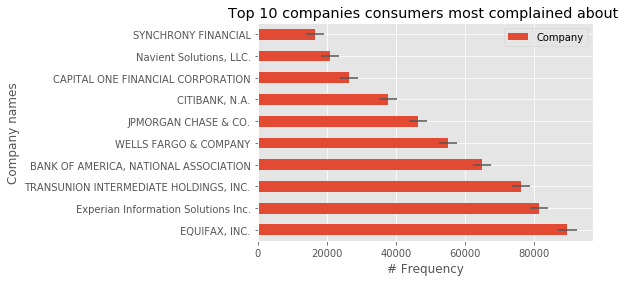

In [54]:
top_10_complaint_by_company.plot(kind='barh',xerr=errors)


plt.xlabel('# Frequency')
plt.ylabel('Company names')
plt.title('Top 10 companies consumers most complained about ')
plt.legend(loc='upper right')
plt.show()

In [55]:
# top 10 companies consumers least complained about
_10_least_complaint =df.Company.value_counts().nsmallest(10)
_10_least_complaint

THE STUDENT LOAN HELP CENTER         1
Alliance Credit Counseling, Inc.     1
Bayside Recovery Services, Inc.      1
HFG HOLDINGS, LLC                    1
Chime Inc.                           1
Certified Credit Associates, Inc.    1
Purpose Funding Inc.                 1
Bakalar & Associates, P. A.          1
Saddleback Acceptance Corporation    1
Michael Scott Cohen LLC              1
Name: Company, dtype: int64

# Get how many debt collection complaint the Bank of America received every day, month, year?

In [56]:
# create a new df with product and company as variables using loc
newDf = df.loc[:,('Product','Company')]
newDf.head(3)
#print("now that the df has been created, a selection must be apply so that Bank of American and debt collection values can be analysed")

,Product,Company
Date_sent_to_company,,
2015-09-08,Credit reporting,Experian Information Solutions Inc.
2019-01-30,"Credit reporting, credit repair services, or o...","EQUIFAX, INC."
2015-08-19,Mortgage,WELLS FARGO & COMPANY


In [57]:
# add new variables the the dataframe 
newDf["Bank_of_America"] = newDf["Company"].str.contains("Bank of America")
newDf["debt_Collection"] = newDf["Product"].str.contains("Debt collection")
newDf.head(1)

,Product,Company,Bank_of_America,debt_Collection
Date_sent_to_company,,,,
2015-09-08,Credit reporting,Experian Information Solutions Inc.,False,False


In [58]:
# drop the unnecessary variables
variableToDrop = ['Product', 'Company']

# Verify whether there are some missing values(nan) in the postcode field, then drop those
newDf= newDf.drop(variableToDrop,1)


newDf.head(1)

,Bank_of_America,debt_Collection
Date_sent_to_company,,
2015-09-08,False,False


In [59]:
# discretise the values in both variable 
newDf.Bank_of_America = newDf.Bank_of_America.astype(int)    # discretise the values in both variable bank of america
newDf.debt_Collection = newDf.debt_Collection.astype(int)    # discretise the values in both variable debt collection

newDf.head()                                                # printout the data sample

,Bank_of_America,debt_Collection
Date_sent_to_company,,
2015-09-08,0,0
2019-01-30,0,0
2015-08-19,0,0
2016-04-03,0,0
2013-03-19,0,0


In [60]:
newDf['weekday'] = newDf.index.weekday

newDf.head(1)

,Bank_of_America,debt_Collection,weekday
Date_sent_to_company,,,
2015-09-08,0,0,1


In [61]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
newDf['weekday'] = newDf['weekday'].map(lambda x: days[x])
newDf.head(1)

,Bank_of_America,debt_Collection,weekday
Date_sent_to_company,,,
2015-09-08,0,0,Tuesday


In [62]:
debt_table = pd.crosstab(index=newDf["weekday"], 
                          columns=newDf["debt_Collection"])

debt_table

debt_Collection,0,1
weekday,,
Friday,123604,28998
Monday,124050,28953
Saturday,64685,15604
Sunday,63447,15743
Thursday,128699,30904
Tuesday,130689,31533
Wednesday,136506,31997


In [63]:
debt_table.describe()

debt_Collection,0,1
count,7.000000,7.000000
mean,110240.000000,26247.428571
std,31840.630511,7316.532030
min,63447.000000,15604.000000
25%,94144.500000,22348.000000
50%,124050.000000,28998.000000
75%,129694.000000,31218.500000
max,136506.000000,31997.000000


In [64]:
Americabank_debt_table = pd.crosstab(index=newDf["weekday"], 
                          columns=newDf["Bank_of_America"])

Americabank_debt_table

Bank_of_America,0
weekday,
Friday,152602
Monday,153003
Saturday,80289
Sunday,79190
Thursday,159603
Tuesday,162222
Wednesday,168503


No handles with labels found to put in legend.


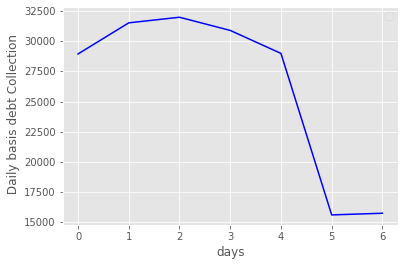

In [65]:
dailycollection = newDf["debt_Collection"].groupby(newDf.index.weekday).aggregate(np.sum)

plt.plot(dailycollection,color='blue' )
plt.xlabel('days')
plt.ylabel(' Daily basis debt Collection')
plt.legend(loc='upper right')
plt.show()

# Timely Response

In [66]:
df = df.dropna(subset=["Timely_response_yes_no"])

In [67]:
df["Timely_response_yes_no"].describe()

count     955412
unique         2
top          Yes
freq      931880
Name: Timely_response_yes_no, dtype: object

In [68]:
# count yes or no 
#Timely response?(yes/no)
Timely_response_tab = pd.crosstab(index=df.Timely_response_yes_no, columns="count_Timely_response")
Timely_response_tab

col_0,count_Timely_response
Timely_response_yes_no,
No,23532
Yes,931880


In [69]:
Timely_response_tab.describe()

col_0,count_Timely_response
count,2.000000
mean,477706.000000
std,642299.030477
min,23532.000000
25%,250619.000000
50%,477706.000000
75%,704793.000000
max,931880.000000


In [70]:
# create additional columns to extract the boolean yes,no
df1["YesTimelyresponse"]= df1.Timely_response_yes_no.str.contains("Yes")
df1["NoTimelyresponse"]= df1.Timely_response_yes_no.str.contains("No")

In [71]:
df1.YesTimelyresponse = df1.YesTimelyresponse.astype(int)
df1.NoTimelyresponse = df1.NoTimelyresponse.astype(int)

In [72]:
# create a new data frame  which select individual Complaint submission type
# This will allow easy plotting of the variable Complaint_Submission_type

df_comp_resp=df1.loc[:,["YesTimelyresponse","NoTimelyresponse"]]


df_comp_resp.head(2)

,YesTimelyresponse,NoTimelyresponse
Date_sent_to_company,,
2015-09-08,1,0
2019-01-30,1,0


No handles with labels found to put in legend.


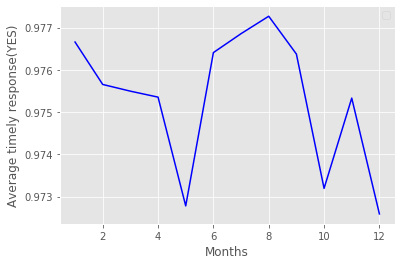

No handles with labels found to put in legend.


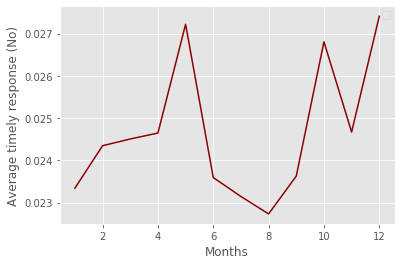

In [73]:
monthMeans = df_comp_resp["YesTimelyresponse"].groupby(df_comp_resp.index.month).aggregate(np.mean)

plt.plot(monthMeans,color='blue' )
plt.xlabel('Months')
plt.ylabel('Average timely response(YES)')
plt.legend(loc='upper right')
plt.show()


monthMeans1 = df_comp_resp["NoTimelyresponse"].groupby(df_comp_resp.index.month).aggregate(np.mean)
plt.plot(monthMeans1,color='darkred')
plt.xlabel('Months')
plt.ylabel('Average timely response (No)')
plt.legend(loc='upper right')
plt.show()

No handles with labels found to put in legend.


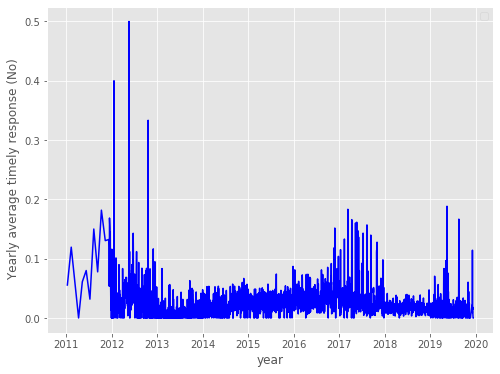

In [74]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]

 
# Set figure width to 12 and height to 9
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size



monthMeans1 = df_comp_resp["NoTimelyresponse"].groupby(df_comp_resp.index).aggregate(np.mean)
plt.plot(monthMeans1,color='blue')
plt.xlabel('year')
plt.ylabel(' Yearly average timely response (No)')
plt.legend(loc='upper right')
plt.show()
#savefig('Yearly average timely response.png')

In [75]:
df["issue"].describe()

count                                   955412
unique                                     166
top       Incorrect information on your report
freq                                    105807
Name: issue, dtype: object

# Issue

In [76]:
Issue_tab = pd.crosstab(index=df.issue, columns="count_issue")
Issue_tab

col_0,count_issue
issue,
APR or interest rate,4359
"Account opening, closing, or management",29137
Account terms and changes,400
Adding money,133
Advertising,55
...,...
Vehicle was repossessed or sold the vehicle,70
"Was approved for a loan, but didn't receive money",13
"Was approved for a loan, but didn't receive the money",55


In [77]:
Issue_tab.describe()

col_0,count_issue
count,166.000000
mean,5755.493976
std,14040.715783
min,1.000000
25%,204.250000
50%,1209.000000
75%,4290.250000
max,105807.000000


In [78]:
# get the top 5 issues people complianed about
top_5_complaint_issue =df1.issue.value_counts().nlargest(5)
top_5_complaint_issue

Incorrect information on your report        105807
Loan modification,collection,foreclosure     80868
Incorrect information on credit report       80700
Loan servicing, payments, escrow account     52429
Cont'd attempts collect debt not owed        46638
Name: issue, dtype: int64

In [79]:
top_5_complaint_issue.describe()

count         5.000000
mean      73288.400000
std       24058.262017
min       46638.000000
25%       52429.000000
50%       80700.000000
75%       80868.000000
max      105807.000000
Name: issue, dtype: float64

In [80]:
# mean 
means1 = df1.issue.value_counts().mean()

#standard deviation of issues
errors1 = df1.issue.value_counts().std()

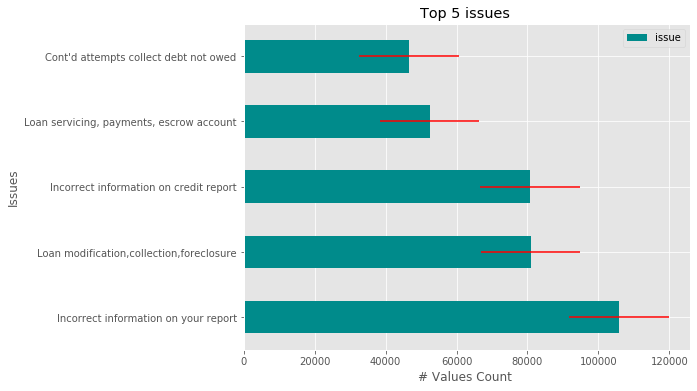

In [81]:
top_5_complaint_issue.plot(kind='barh',color='darkcyan',xerr=errors1,ecolor='r')


plt.xlabel('# Values Count ')
plt.ylabel('Issues')
plt.title('Top 5 issues ')
plt.legend(loc='upper right')
plt.show()

# Creating a Series

In [82]:
state_filter = ((df["Product"] == "Credit card" ) & 
                   (df["State"] == "CA" ))
                   

# Let's make a copy to work with a new, clean block of memory 
# (if you are interested, try and remove the copy to see the consequences further down...)
CA_Creditcard =df[state_filter].copy()
#european_stations["Country"].unique()
CA_Creditcard.head(1)

,Date received,Product,Sub_product,issue,sub-issue,consumer_complaint_explanation,Company_response,Company,State,Postal_code,Consumer_consent_provided,Complaint_Submission_type,Company_response_to_consumer,Timely_response_yes_no,Consumer disagrees,EmailSubmission,FaxSubmission,PhoneSubmission,PostalSubmission,ReferralSubmission,WebSubmission
Date_sent_to_company,,,,,,,,,,,,,,,,,,,,,
2017-02-21,02/21/2017,Credit card,NaN,Transaction issue,NaN,I booked a ticket for XXXX XXXX. XXXX changed ...,NaN,AMERICAN EXPRESS COMPANY,CA,945XX,Consent provided,Web,Closed with explanation,Yes,No,False,False,False,False,False,True


In [83]:
CAcrdedit_card = CA_Creditcard.loc[:,("Product", "State") ]

In [84]:
CAcrdedit_card.describe()

,Product,State
count,9858,9858
unique,1,1
top,Credit card,CA
freq,9858,9858


In [85]:
state_filter = ((df["Product"] == "Credit card" ) & 
                   (df["State"] == "MT" ))
                   

# Let's make a copy to work with a new, clean block of memory 
# (if you are interested, try and remove the copy to see the consequences further down...)
MT_Creditcard =df[state_filter].copy()
#european_stations["Country"].unique()
MT_Creditcard.head(1)

,Date received,Product,Sub_product,issue,sub-issue,consumer_complaint_explanation,Company_response,Company,State,Postal_code,Consumer_consent_provided,Complaint_Submission_type,Company_response_to_consumer,Timely_response_yes_no,Consumer disagrees,EmailSubmission,FaxSubmission,PhoneSubmission,PostalSubmission,ReferralSubmission,WebSubmission
Date_sent_to_company,,,,,,,,,,,,,,,,,,,,,
2013-06-12,12-06-13,Credit card,NaN,Delinquent account,NaN,NaN,NaN,CAPITAL ONE FINANCIAL CORPORATION,MT,598XX,NaN,Web,Closed with non-monetary relief,Yes,No,False,False,False,False,False,True


In [86]:
MTcrdedit_card = MT_Creditcard.loc[:,("Product", "State") ]

In [87]:
MTcrdedit_card.describe()

,Product,State
count,126,126
unique,1,1
top,Credit card,MT
freq,126,126


In [88]:
company_filter = ((df["Product"] == "Credit card" ) & 
                   (df["Company"] == "Bank of America" ))
                   

# Let's make a copy to work with a new, clean block of memory 
# (if you are interested, try and remove the copy to see the consequences further down...)
Creditcard =df[company_filter].copy()
#european_stations["Country"].unique()
Creditcard.head(1)

,Date received,Product,Sub_product,issue,sub-issue,consumer_complaint_explanation,Company_response,Company,State,Postal_code,Consumer_consent_provided,Complaint_Submission_type,Company_response_to_consumer,Timely_response_yes_no,Consumer disagrees,EmailSubmission,FaxSubmission,PhoneSubmission,PostalSubmission,ReferralSubmission,WebSubmission
Date_sent_to_company,,,,,,,,,,,,,,,,,,,,,


In [89]:
BoACreditcard = Creditcard.loc[:,("Product", "Company") ]

In [90]:
# get the dummies value
BoACreditcard = pd.get_dummies( BoACreditcard)
BoACreditcard.head()

""
Date_sent_to_company
